In [1]:
from src.langchain.chains.movie_rag import MovieRAGChain
from src.langchain.loaders import MoviePosterDocumentLoader
from langchain_openai import ChatOpenAI
from langchain.chains import LLMChain
from src.retrievers.visual_retriever import VisualRetriever
from src.langchain.retrieval.retrievers import VisualRetrieverWrapper

Let's use Langchain's own retriever

In [5]:
print("="*60)
print("LangChain Built-in Retriever (Default)")
print("="*60)

chain = MovieRAGChain(
    plots_path="/Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/movie_plots.csv",
    reviews_path="/Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/reviews_w_movies_full.csv",
    max_movies=1000,
    use_custom_retriever=False,  # Use LangChain
    k=3,
)

chain.build()

# Test query
result = chain.query("What movies are about dreams?")
print(f"\nQ: {result['question']}")
print(f"A: {result['answer']}")
print(f"\nSources: {len(result.get('sources', []))}")

LangChain Built-in Retriever (Default)
✓ MovieRAGChain initialized
  Retriever type: langchain
  LLM: gpt-4o-mini

Building RAG Pipeline

1. Loading documents...
Limiting to 1000 movies
Loading plots from /Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/movie_plots.csv...
Created 758 plot docs.
  ✓ 758 plot documents
Loading reviews from /Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/reviews_w_movies_full.csv...
Created 1000 review docs.
  ✓ 1000 review documents
✓ Total: 1758 reviews and plots documents

2. Chunking with LangChain...
  Created 24120 chunks from 1758 documents

3. Building LangChain FAISS retriever...

4. Creating QA chain...

✓ RAG Pipeline Built!

Q: What movies are about dreams?
A: Based on the provided context, the movies that are about dreams include:

1. **In Dreams** (1999) - A horror, mystery, and suspense film directed by Neil Jordan.
2. **A Nightmare on Elm Street 4: The Dream Master** (1988) - A horror film directe

In [3]:
print("\n" + "="*60)
print("Custom Dense Retriever")
print("="*60)

chain = MovieRAGChain(
    plots_path="/Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/movie_plots.csv",
    reviews_path="/Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/reviews_w_movies_full.csv",
    max_movies=1000,
    use_custom_retriever=True,
    k=3,
)

chain.build()

result = chain.query("What movies are about dreams?")
print(f"\nQ: {result['question']}")
print(f"A: {result['answer']}")


Custom Dense Retriever
✓ MovieRAGChain initialized
  Retriever type: custom
  LLM: gpt-4o-mini

Building RAG Pipeline

1. Loading documents...
Limiting to 1000 movies
Loading plots from /Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/movie_plots.csv...
Created 779 plot docs.
  ✓ 779 plot documents
Loading reviews from /Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/reviews_w_movies_full.csv...
Created 1000 review docs.
  ✓ 1000 review documents
✓ Total: 1779 reviews and plots documents

2. Chunking with LangChain...
  Created 23584 chunks from 1779 documents

3. Building custom retriever...
Loading embedding model: text-embedding-3-small (provider: openai)
✓ Model loaded (dimension: 1536)
✓ FaissDenseRetriever initialized (index_type=flat)
Generating embeddings for 23584 documents...
Embeddings generated
Saving index...
✓ Added 23584 documents to FAISS index
  Index size: 23584

4. Creating QA chain...

✓ RAG Pipeline Built!


/var/folders/cn/c128jxq14x58d9hbzblcrvbw0000gn/T/ipykernel_43454/3483058782.py:156: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = self.qa_chain({"query": question})



Q: What movies are about dreams?
A: Some movies that explore themes related to dreams include:

1. **Inception** (2010) - A skilled thief who steals secrets from within the subconscious is given a chance to have his criminal history erased if he can implant an idea into a target's mind.
2. **Waking Life** (2001) - This film follows a man on a journey through his dreams, exploring existential questions and the nature of reality.
3. **The Science of Sleep** (2006) - A surreal exploration of the line between dreams and reality as a man struggles to connect with his neighbor.
4. **Dreamscape** (1984) - A thriller about a man who enters the dreams of others to confront their fears and ultimately face a dangerous entity.
5. **Eternal Sunshine of the Spotless Mind** (2004) - Although not strictly about dreams, it explores memory and the subconscious through a narrative that feels dreamlike.

These films delve into various aspects of dreams, consciousness, and existential themes.


### I think my custom pipeline was better in every sense! My custom chunking, retrieval, and prompts were better
Let's try custom chunking

In [11]:
print("="*60)
print("LangChain Built-in Retriever (Default)")
print("="*60)

chain = MovieRAGChain(
    plots_path="/Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/movie_plots.csv",
    reviews_path="/Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/reviews_w_movies_full.csv",
    max_movies=1000,
    use_custom_retriever=False,  # Use LangChain
    use_custom_chunk=True,
    k=3,
)

chain.build()

# Test query
result = chain.query("What movies are about dreams?")
print(f"\nQ: {result['question']}")
print(f"A: {result['answer']}")
print(f"\nSources: {len(result.get('sources', []))}")

LangChain Built-in Retriever (Default)
✓ MovieRAGChain initialized
  Retriever type: langchain
  LLM: gpt-4o-mini

Building RAG Pipeline

1. Loading documents...
Limiting to 1000 movies
Loading plots from /Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/movie_plots.csv...
Created 794 plot docs.
  ✓ 794 plot documents
Loading reviews from /Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/reviews_w_movies_full.csv...
Created 1000 review docs.
  ✓ 1000 review documents
✓ Total: 1794 reviews and plots documents

2. Chunking with custom func...

Chunking documents...
Chunked 1794 docs → 21730 chunks using 'sentence' strategy.

3. Building LangChain FAISS retriever...

4. Creating QA chain...

✓ RAG Pipeline Built!

Q: What movies are about dreams?
A: I don't know.

Sources: 3


In [41]:
print("\n" + "="*60)
print("Custom Dense Retriever")
print("="*60)

chain = MovieRAGChain(
    plots_path="/Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/movie_plots.csv",
    reviews_path="/Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/reviews_w_movies_full.csv",
    max_movies=300,
    use_custom_retriever=True,
    use_custom_chunk=True,
    k=3,
)

chain.build()

result = chain.query("What movies are about dreams?")
print(f"\nQ: {result['question']}")
print(f"A: {result['answer']}")


Custom Dense Retriever
✓ MovieRAGChain initialized
  Retriever type: custom
  LLM: gpt-4o-mini

Building RAG Pipeline

1. Loading documents...
Limiting to 300 movies
Loading plots from /Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/movie_plots.csv...
Created 232 plot docs.
  ✓ 232 plot documents
Loading reviews from /Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/reviews_w_movies_full.csv...
Created 300 review docs.
  ✓ 300 review documents
✓ Total: 532 reviews and plots documents

2. Chunking with custom func...

Chunking documents...
Chunked 532 docs → 6366 chunks using 'sentence' strategy.

3. Building custom retriever...
Loading embedding model: text-embedding-3-small (provider: openai)
✓ Model loaded (dimension: 1536)
✓ FaissDenseRetriever initialized (index_type=flat)
Generating embeddings for 6366 documents...
Embeddings generated
Saving index...
✓ Added 6366 documents to FAISS index
  Index size: 6366

4. Creating QA chain...

✓ RAG

In [44]:
result = chain.query("Tell me some funny action movies")
print(f"\nQ: {result['question']}")
print(f"A: {result['answer']}")


Q: Tell me some funny action movies
A: Some funny action movies you might enjoy include:

1. **Hot Fuzz** - A blend of action and comedy with a satirical take on buddy cop films.
2. **21 Jump Street** - A comedic take on undercover police work with plenty of action and laughs.
3. **Kung Fu Hustle** - A hilarious kung fu film filled with over-the-top action and humor.
4. **Tropic Thunder** - A satirical action-comedy about a group of actors filming a war movie who find themselves in real danger.
5. **The Other Guys** - A buddy cop comedy that parodies the action genre while delivering laughs and action sequences.

These films combine humor with action, making for an entertaining viewing experience.


In [45]:
print("retrieved sources were:\n")
print([(doc['content'][:150], doc['metadata']['movie_title']) for doc in result['sources']])

retrieved sources were:

[('Review: Its tongue-in-cheek humour and lapidary one-liners are combined with some well-staged stunts.\nReview: The action includes an amusing scene fea', 'Big Game'), ('Review: A blitzkrieg of hilarious kung fu craziness.\nReview: A fall-out-of-the-chair, funny movie!\nReview: None of this is meant to be taken seriously', 'Shaolin Soccer'), ('Review: For a good laugh, check it out; for good action, look elsewhere.\nReview: Feh!!!!! Sly sucked. The comic book sucked worse.\nReview: If there wa', 'Judge Dredd')]


#### Testing visual retriever that's wrapped with langchain still works

In [29]:
from IPython.display import display
import PIL
from path import Path
import pandas as pd
import random


Visual Retriever
Loaded 6431 posters
Created 6079 poster docs.
Loading CLIP model: ViT-B/32
✓ CLIP loaded on cpu
✓ VisualRetriever (text_fusion=True, method=weight_average)
  Alpha: 0.8 (image=0.8, text=0.2)
Encoding 1000 posters with CLIP...
Encoding 1000 text descriptions with CLIP...
✓ Fused embeddings using weight_average method (dim=512)
✓ Added 1000 posters to index


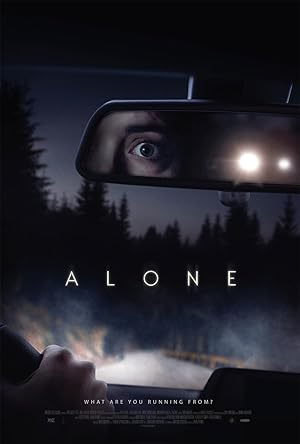

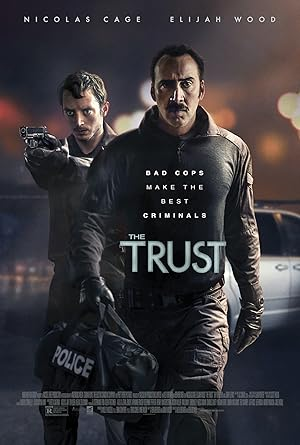

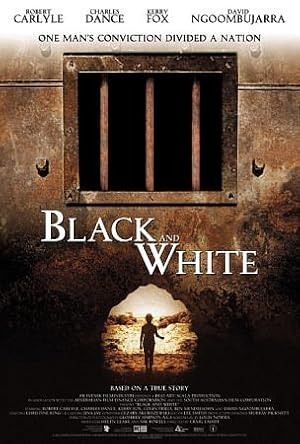

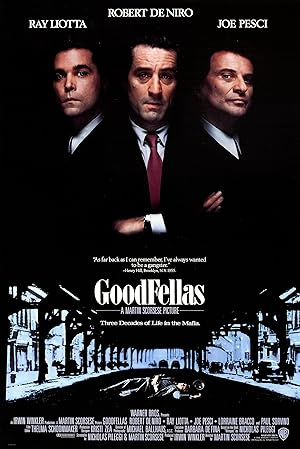

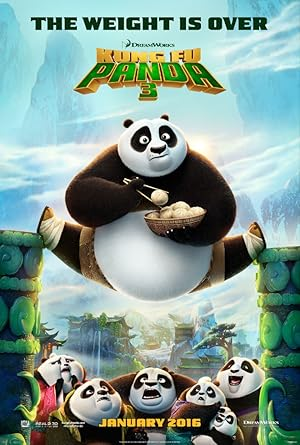

In [30]:
print("\n" + "="*60)
print("Visual Retriever")
print("="*60)

poster_loader = MoviePosterDocumentLoader('/Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/movie_posters.csv', max_movies=1000)   # small number since model is local
visual_docs = poster_loader.load()

visual_retriever = VisualRetriever(model_name="ViT-B/32", use_text_fusion=True, alpha=0.8)

retriever = VisualRetrieverWrapper(retriever=visual_retriever, k=5)

retriever.add_documents(visual_docs)
result = retriever._get_relevant_documents("dark moody poster")

for doc in result:
    path = doc.metadata['poster_path']
    with PIL.Image.open(path) as img:
        display(img)

### Prompt engineering

In [4]:
from langchain.prompts import PromptTemplate

In [15]:
from src.langchain.prompts import FEW_SHOT_QA_PROMPT, ZERO_SHOT_QA_PROMPT

In [50]:
print("\n" + "="*60)
print("Prompt Engineering")
print("="*60)

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.7)
query = "I want movies like Inception"

# Zero-shot
print("\nZero-shot:")
zero_chain = LLMChain(
    llm=llm,
    prompt=PromptTemplate(
        input_variables=["query"],
        template="User: {query}\nAssistant:"
    )
)
print(zero_chain.invoke({'query':query}))

# Few-shot
print("\nFew-shot (with examples):")
few_chain = LLMChain(llm=llm, prompt=FEW_SHOT_QA_PROMPT)
print(few_chain.invoke({'question':query, 'context':""}))


Prompt Engineering

Zero-shot:
{'query': 'I want movies like Inception', 'text': 'If you enjoyed "Inception," here are some movies you might like that feature similar themes of mind-bending plots, complex narratives, or psychological twists:\n\n1. **Interstellar (2014)** - Directed by Christopher Nolan, this film explores space, time, and love, with stunning visuals and a thought-provoking narrative.\n\n2. **The Matrix (1999)** - A groundbreaking sci-fi film that questions reality and features a dystopian future where humanity is unknowingly trapped inside a simulated reality.\n\n3. **Shutter Island (2010)** - A psychological thriller directed by Martin Scorsese, it follows a U.S. Marshal investigating a psychiatric facility with unexpected twists.\n\n4. **Memento (2000)** - Another Nolan film, this neo-noir psychological thriller is told in a non-linear fashion, focusing on a man with short-term memory loss trying to solve his wife\'s murder.\n\n5. **Eternal Sunshine of the Spotless 

#### Let's use prompt templates in my pipeline

In [17]:
print("\n" + "="*60)
print("Custom Dense Retriever with custom chunk and custom zero shot prompt")
print("="*60)

chain = MovieRAGChain(
    plots_path="/Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/movie_plots.csv",
    reviews_path="/Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/reviews_w_movies_full.csv",
    max_movies=300,
    use_custom_retriever=True,
    use_custom_chunk=True,
    k=3,
    custom_prompt=ZERO_SHOT_QA_PROMPT
)

chain.build()

result = chain.query("Romantic movie in new york")
print(f"\nQ: {result['question']}")
print(f"A: {result['answer']}")


Custom Dense Retriever with custom chunk and custom zero shot prompt
✓ MovieRAGChain initialized
  Retriever type: custom
  LLM: gpt-4o-mini

Building RAG Pipeline

1. Loading documents...
Limiting to 300 movies
Loading plots from /Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/movie_plots.csv...
Created 233 plot docs.
  ✓ 233 plot documents
Loading reviews from /Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/reviews_w_movies_full.csv...
Created 300 review docs.
  ✓ 300 review documents
✓ Total: 533 reviews and plots documents

2. Chunking with custom func...

Chunking documents...
Chunked 533 docs → 6796 chunks using 'sentence' strategy.

3. Building custom retriever...
Loading embedding model: text-embedding-3-small (provider: openai)
✓ Model loaded (dimension: 1536)
✓ FaissDenseRetriever initialized (index_type=flat)
Generating embeddings for 6796 documents...
Embeddings generated
Saving index...
✓ Added 6796 documents to FAISS index
  In

In [25]:
print("retrieved sources were:\n")
print([(doc['content'][:150], doc['metadata']['movie_title']) for doc in result['sources']])

retrieved sources were:

[('Movie title: Brooklyn\nRelease year: 2015\nDirectors: John Crowley\nGenres: Drama\nContent rating: PG-13\nRuntime: 112.0\nTomatometer rating: 97.0\nBox offic', 'Brooklyn'), ('Movie title: Rent\nRelease year: 2005\nDirectors: Chris Columbus\nGenres: Comedy, Musical & Performing Arts, Romance\nContent rating: PG-13\nRuntime: 135.0', 'Rent'), ('David. New York City is full of lonely hearts seeking the right match, be it a love connection, a hook-up, or something in the middle. And somewhere b', 'How To Be Single')]


In [30]:
print("\n" + "="*60)
print("Custom Dense Retriever with custom chunk and custom few shot prompt")
print("="*60)

chain = MovieRAGChain(
    plots_path="/Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/movie_plots.csv",
    reviews_path="/Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/reviews_w_movies_full.csv",
    max_movies=300,
    use_custom_retriever=True,
    use_custom_chunk=True,
    k=3,
    custom_prompt=FEW_SHOT_QA_PROMPT
)

chain.build()

result = chain.query("Romantic movie in new york")
print(f"\nQ: {result['question']}")
print(f"A: {result['answer']}")


Custom Dense Retriever with custom chunk and custom few shot prompt
✓ MovieRAGChain initialized
  Retriever type: custom
  LLM: gpt-4o-mini

Building RAG Pipeline

1. Loading documents...
Limiting to 300 movies
Loading plots from /Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/movie_plots.csv...
Created 226 plot docs.
  ✓ 226 plot documents
Loading reviews from /Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/reviews_w_movies_full.csv...
Created 300 review docs.
  ✓ 300 review documents
✓ Total: 526 reviews and plots documents

2. Chunking with custom func...

Chunking documents...
Chunked 526 docs → 6483 chunks using 'sentence' strategy.

3. Building custom retriever...
Loading embedding model: text-embedding-3-small (provider: openai)
✓ Model loaded (dimension: 1536)
✓ FaissDenseRetriever initialized (index_type=flat)
Generating embeddings for 6483 documents...
Embeddings generated
Saving index...
✓ Added 6483 documents to FAISS index
  Ind

In [31]:
print("retrieved sources were:\n")
print([(doc['content'][:150], doc['metadata']['movie_title']) for doc in result['sources']])

retrieved sources were:

[('Movie title: King of New York\nRelease year: 1990\nDirectors: Abel Ferrara\nGenres: Action & Adventure, Drama\nContent rating: R\nRuntime: 104.0\nTomatomete', 'King of New York'), ('Movie title: King of New York\nRelease year: 1990\nDirectors: Abel Ferrara\nGenres: Action & Adventure, Drama\nContent rating: R\nRuntime: 104.0\nTomatomete', 'King of New York'), ("Review: Mail offers us a fantasy version of New York, the one we'd all like to live in, that only serves to enhance the film's genuine New York magic.", "You've Got Mail")]


## The few shot examples are promoting out of context suggestion! Not good
The custom prompts also sometimes promote hallucination. I'll do my own custom zero shot prompt

In [32]:
print("\n" + "="*60)
print("Custom Dense Retriever with custom chunk and default prompt")
print("="*60)

chain = MovieRAGChain(
    plots_path="/Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/movie_plots.csv",
    reviews_path="/Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/reviews_w_movies_full.csv",
    max_movies=300,
    use_custom_retriever=True,
    use_custom_chunk=True,
    k=3,
    custom_prompt=None
)

chain.build()

result = chain.query("Romantic movie in new york")
print(f"\nQ: {result['question']}")
print(f"A: {result['answer']}")


Custom Dense Retriever with custom chunk and default prompt
✓ MovieRAGChain initialized
  Retriever type: custom
  LLM: gpt-4o-mini

Building RAG Pipeline

1. Loading documents...
Limiting to 300 movies
Loading plots from /Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/movie_plots.csv...
Created 233 plot docs.
  ✓ 233 plot documents
Loading reviews from /Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/reviews_w_movies_full.csv...
Created 300 review docs.
  ✓ 300 review documents
✓ Total: 533 reviews and plots documents

2. Chunking with custom func...

Chunking documents...
Chunked 533 docs → 6873 chunks using 'sentence' strategy.

3. Building custom retriever...
Loading embedding model: text-embedding-3-small (provider: openai)
✓ Model loaded (dimension: 1536)
✓ FaissDenseRetriever initialized (index_type=flat)
Generating embeddings for 6873 documents...
Embeddings generated
Saving index...
✓ Added 6873 documents to FAISS index
  Index size:

In [33]:
print("retrieved sources were:\n")
print([(doc['content'][:150], doc['metadata']['movie_title']) for doc in result['sources']])

retrieved sources were:

[('Movie title: New In Town\nRelease year: 2009\nDirectors: Jonas Elmer\nGenres: Comedy, Romance\nContent rating: PG\nRuntime: 96.0\nTomatometer rating: 28.0\nB', 'New In Town'), ('Movie title: New In Town\nRelease year: 2009\nDirectors: Jonas Elmer\nGenres: Comedy, Romance\nContent rating: PG\nRuntime: 96.0\nTomatometer rating: 28.0\nB', 'New In Town'), ('Movie title: Sex and the City\nRelease year: 2008\nDirectors: Michael Patrick King\nGenres: Comedy, Romance\nContent rating: R\nRuntime: 145.0\nTomatometer ', 'Sex and the City')]


In [47]:
print("\n" + "="*60)
print("Custom Dense Retriever with custom chunk and custom few shot prompt")
print("="*60)

chain = MovieRAGChain(
    plots_path="/Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/movie_plots.csv",
    reviews_path="/Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/reviews_w_movies_full.csv",
    max_movies=300,
    use_custom_retriever=True,
    use_custom_chunk=True,
    k=3,
    custom_prompt=ZERO_SHOT_QA_PROMPT
)

chain.build()

result = chain.query("Tell me some funny action movies")
print(f"\nQ: {result['question']}")
print(f"A: {result['answer']}")


Custom Dense Retriever with custom chunk and custom few shot prompt
✓ MovieRAGChain initialized
  Retriever type: custom
  LLM: gpt-4o-mini

Building RAG Pipeline

1. Loading documents...
Limiting to 300 movies
Loading plots from /Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/movie_plots.csv...
Created 247 plot docs.
  ✓ 247 plot documents
Loading reviews from /Users/saghar/Desktop/movie-rag/datasets/rotten-tomatoes-reviews/prep/reviews_w_movies_full.csv...
Created 300 review docs.
  ✓ 300 review documents
✓ Total: 547 reviews and plots documents

2. Chunking with custom func...

Chunking documents...
Chunked 547 docs → 6390 chunks using 'sentence' strategy.

3. Building custom retriever...
Loading embedding model: text-embedding-3-small (provider: openai)
✓ Model loaded (dimension: 1536)
✓ FaissDenseRetriever initialized (index_type=flat)
Generating embeddings for 6390 documents...
Embeddings generated
Saving index...
✓ Added 6390 documents to FAISS index
  Ind